# Visualizing the whole dataset
This notebook simply visualizes the whole PiCS dataset and its feature space using a simple PCA method.

In [1]:
# Import the libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.decomposition import PCA

# Set a seaborn theme
sns.set_theme(style='ticks', rc={"axes.spines.right": False, "axes.spines.top": False, "figure.dpi":300, 'savefig.dpi':200}, font='Arial')

# Read the ds and separate the image file name from the overall ds
df = pd.read_excel('CMDSCALECoordinates.xlsx')
resources = df['resource']
df = df.drop('resource', axis=1)

Plotting images instead of points is quite tricky in seaborn/matplotlib. It is impossible to plot them directly, but there is a workaround. I will first read in the images into the list, then loop thorugh them and set up an OffsetImage and wrap them in the annotation box which will be located at the corresponding invisible point. 

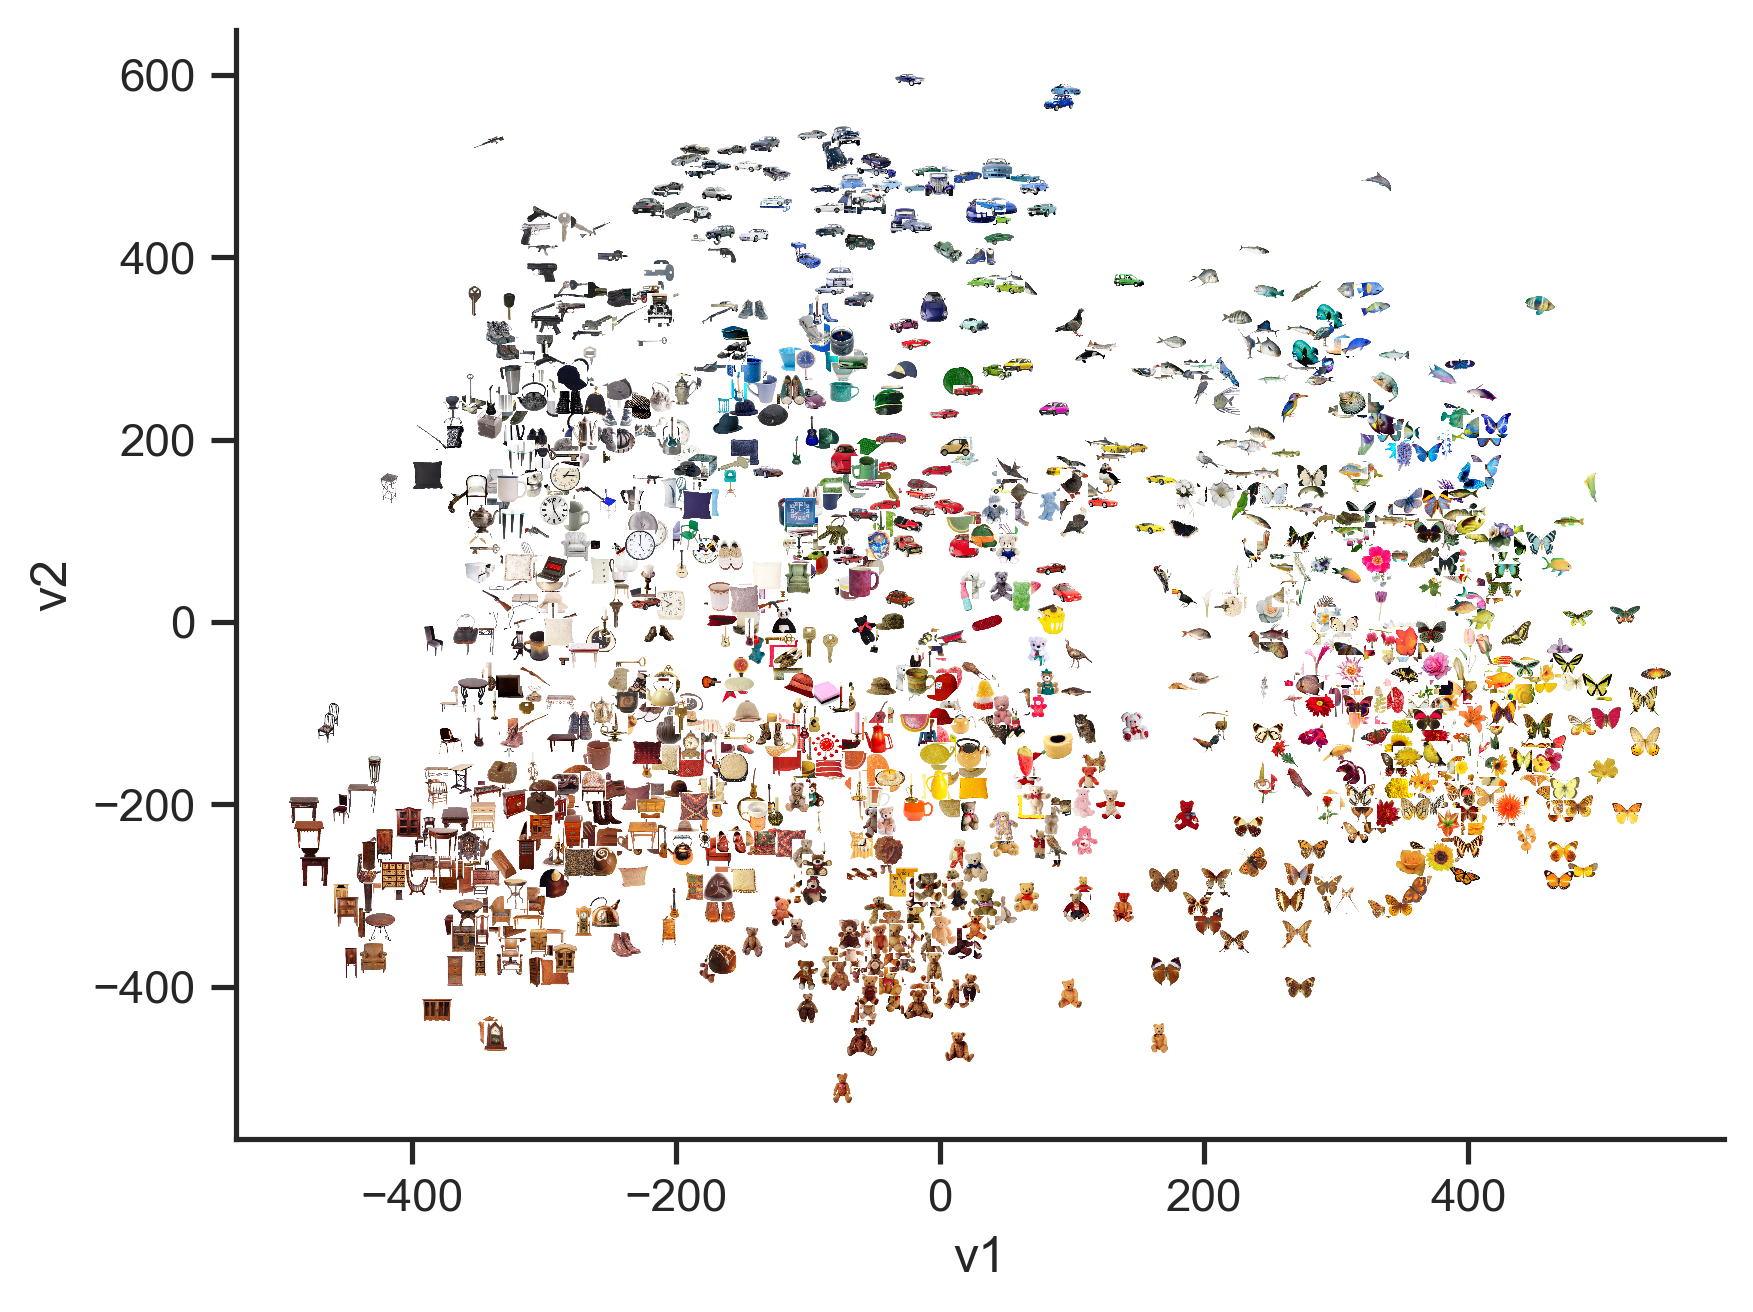

In [2]:
# Run PCA and reassemble the DS with the first 3 components and file names
pca = PCA(n_components=3).fit_transform(df)
final_df = pd.DataFrame()
final_df['resource'] = resources
final_df['v1'] = pca[:,0]
final_df['v2'] = pca[:,1]
final_df['v3'] = pca[:,2]

# Set up the figure and plot invisible points in the place of the images
fig, ax = plt.subplots()
sns.scatterplot(x=final_df['v1'], y=final_df['v2'], ax=ax, s=0)

# Loop thorugh the image file names and read them from the resource folder
images = []
for name in final_df['resource']:
    img = plt.imread('Resources/' + str(name) + '.png')
    images.append(img)

# Wrap the image in the annotation box and position it at the invisible point
for i, image_path in enumerate(images):
    image = OffsetImage(image_path, zoom=0.07)
    image.image.axes = ax
    ab = AnnotationBbox(image, (final_df['v1'][i], final_df['v2'][i]), frameon=False)
    ax.add_artist(ab)

plt.show()

Done! Looks pretty cool. Also, it's easy to see how the images are grouped and how color and shape affects their perceived similarity.